In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \Large
Z_{n+1} = (-Z_{n})^{ (-e^{Z_{n}^{x}})^{(e^{Z_{n}^{x}})^\
{(-e^{Z_{n}^{x}})^{(e^{Z_{n}^{x}})^{(-e^{Z_{n}^{x}})^\
{(e^{Z_{n}^{x}})^{(-e^{Z_{n}^{x}})^{(e^{Z_{n}^{x}})} }} } } } } }
\end{eqnarray}""")

<IPython.core.display.Latex object>

# Dread Skull (er whatever)
    
    Z = (-Z)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x))))))))
    
    Example parameter:
    x = -0.295887110004

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def dreadSkull(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
        p[0]
    
    MATLAB:
    Z = (-Z)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x)^(exp(Z^x)^(-exp(Z^x))))))))
    """
    ZEP = np.exp(Z**p)
    Zout = (-Z)**(-ZEP**(ZEP**(-ZEP**(ZEP**(-ZEP**(ZEP**(-ZEP)))))))
    return Zout

In [4]:
#                                        -- define parameters p iterate the above equation
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = 0.75 + 0.0*1j
par_set['theta'] = -np.pi / 2
par_set['zoom'] = 0.4

par_set['it_max'] = 256
par_set['max_d'] = 12 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = -0.295887110004

list_tuple = [(dreadSkull, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

53.495667934417725 	 total time
converstion time =	 1.2729570865631104


coloring time:	 6.900467872619629


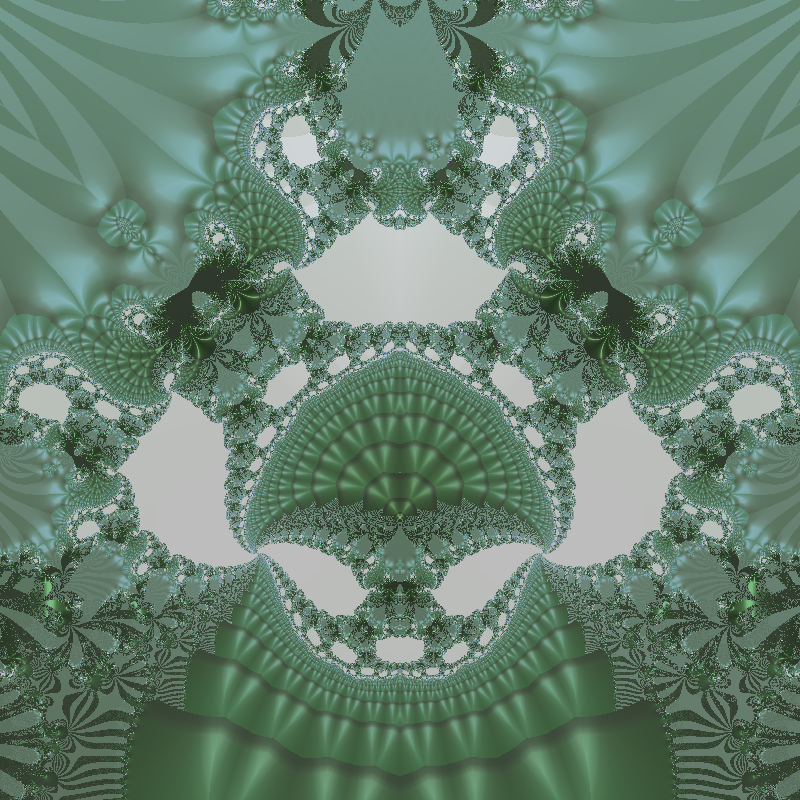

In [35]:
H = ncp.range_norm(ETn*Zd*Zr, lo=0.3, hi=1.0)
S = ncp.range_norm(1 - (ETn-(1-0.2*Zr)*Zd), lo=0.0, hi=0.4)
V = ncp.range_norm(Zd*Zr + ETn, lo=0.2, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 7.601583003997803


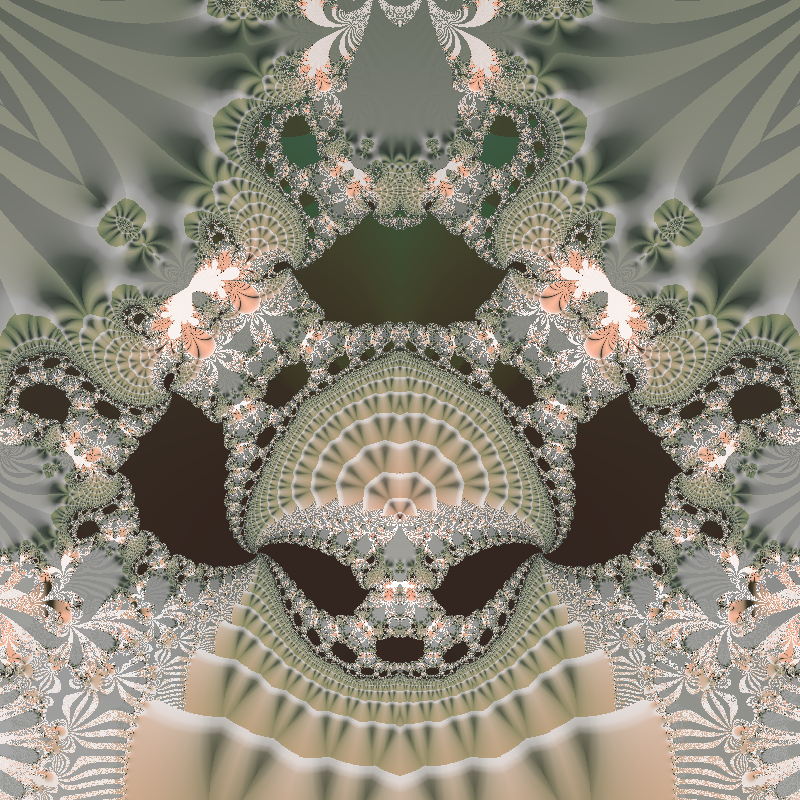

In [37]:
H = ncp.range_norm(ETn*Zd*Zr, lo=0.05, hi=1.0)
S = ncp.range_norm((ETn-(1-0.2*Zr)*Zd), lo=0.0, hi=0.4)
V = ncp.range_norm(1 - (Zd*Zr + ETn), lo=0.2, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [5]:
#                                        smaller
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 0.75 + 0.0*1j
par_set['theta'] = -np.pi / 2
par_set['zoom'] = 0.4

par_set['it_max'] = 256
par_set['max_d'] = 12 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = -0.295887110004
list_tuple = [(dreadSkull, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print('converstion time =\t', time.time() - t0)

3.5660510063171387 	 total time
converstion time =	 0.08025288581848145


coloring time =	 0.23728203773498535


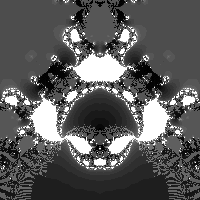

In [6]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 0.22574996948242188


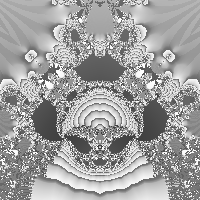

In [7]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 0.22591900825500488


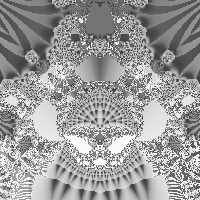

In [8]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(1-Zr_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 0.4490809440612793


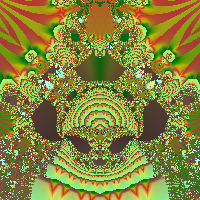

In [9]:
H = ncp.range_norm(Zr_sm - Zd_sm, lo=0.0, hi=0.5)
S = ncp.range_norm(Zr_sm, lo=0.25, hi=1.0)
V = ncp.range_norm(Zd_sm, lo=0.25, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 0.4561150074005127


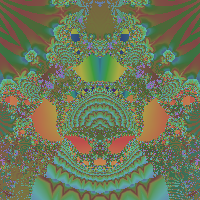

In [10]:
H = ncp.range_norm(Zr_sm - Zd_sm, lo=0.0, hi=0.8)
S = ncp.range_norm(ETn_sm, lo=0.4, hi=0.6)
V = ncp.range_norm(ETn_sm + (Zd_sm - Zr_sm), lo=0.4, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

ET =	 2


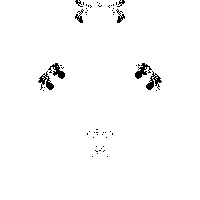

ET =	 3


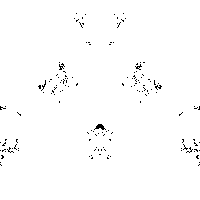

ET =	 4


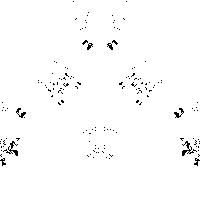

ET =	 5


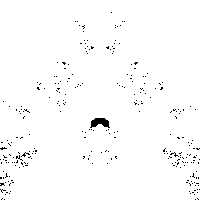

ET =	 6


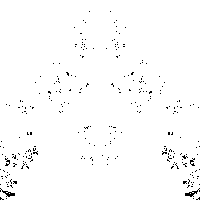

ET =	 7


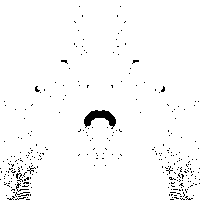

ET >	 8


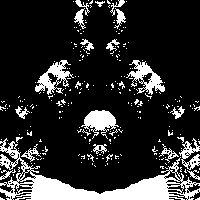

In [11]:
#                                        view smaller - individual escape time starting points
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [12]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 265
2 709
3 454
4 610
5 630
6 634
7 1007
8 2861
9 816
10 1768
11 827
12 854
13 744
14 486
15 736
16 275
17 736
18 327
19 9383
20 302
21 3487
22 322
23 2075
24 228
25 1742
26 155
27 727
28 125
29 411
30 100
31 251
32 75
33 210
34 60
35 110
36 37
37 57
38 33
39 58
40 27
41 42
42 16
43 30
44 8
45 14
46 8
47 14
48 4
49 10
50 8
51 8
52 4
53 12
54 0
55 4
56 4
57 0
58 0
59 0
60 4
61 2
62 2
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 2
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170

In [13]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  3.87 32.9 degrees

     5090 total unescaped points

   points near V       (plane units)
     5090 within V/ 1  (3.873)
     5090 within V/ 2  (1.936)
     5083 within V/ 3  (1.291)
     4195 within V/ 4  (0.968)
     2588 within V/ 5  (0.775)
     1788 within V/ 6  (0.645)
     1371 within V/ 7  (0.553)
      869 within V/ 8  (0.484)
      430 within V/ 9  (0.430)
      240 within V/10  (0.387)
      202 within V/11  (0.352)
